# Welcome to Smoke Detection Dataset

## Table of content:
* [Introduction](#introduction) 
    * [Context](#context)
    * [About the dataset](#about)
    * [Acknowledgement / Credits](#credits)
* [Exploratory Data Analysis](#eda)
    * [Feature Selection](#feature_s)
* [Training ML-Model](#model)
    * [Data preprocessing](#preprocessing)
    * [Scaling the Features (Normalization)](#normalization)
    * [Feature Importance](#f_importance)

## Introduction <a class="anchor" id="introduction"></a>

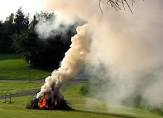

### Context <a class="anchor" id="context"></a>
A smoke detector is a device that senses smoke, typically as an indicator of fire. Smoke detectors are usually housed in plastic enclosures, typically shaped like a disk about 150 millimetres (6 in) in diameter and 25 millimetres (1 in) thick, but shape and size vary.

<b> --> Types of Smoke Detectors </b>

<b>Photoelectric Smoke Detector </b><br>
A photoelectric smoke detector contains a source of infrared, visible, or ultraviolet light, a lens, and a photoelectric receiver. In some types, the light emitted by the light source passes through the air being tested and reaches the photosensor. The received light intensity will be reduced due to scattering from particles of smoke, air-borne dust, or other substances; the circuitry detects the light intensity and generates an alarm if it is below a specified threshold, potentially due to smoke. Such detectors are also known as optical detectors.

<b>Ionization Smoke Detector</b><br>
An ionization smoke detector uses a radioisotope to ionize air. If any smoke particles enter the open chamber, some of the ions will attach to the particles and not be available to carry the current in that chamber. An electronic circuit detects that a current difference has developed between the open and sealed chambers, and sounds the alarm
<br>
The author of this dataset has successfully created a smoke detection device with the help of IOT devices and AI model. ([Acknowledgement / Credits](#credits) )

### About the dataset <a class="anchor" id="about"></a>
Collection of training data is performed with the help of IOT devices since the goal is to develop a AI based smoke detector device.
Many different environments and fire sources have to be sampled to ensure a good dataset for training. A short list of different scenarios which are captured:

- Normal indoor<br>
- Normal outdoor
- Indoor wood fire, firefighter training area
- Indoor gas fire, firefighter training area
- Outdoor wood, coal, and gas grill
- Outdoor high humidity 
- etc.
<br>
The dataset is nearly 60.000 readings long. The sample rate is 1Hz for all sensors. To keep track of the data, a UTC timestamp is added to every sensor reading.<br>
<br>

The dataset contains air properties gotten from the proposed sorrounding of the experiment. <br>The dataset has 16 columns which are:<br>
Columns: <a class="anchor" id="columns"></a>
1. Unnamed:0 - Index
2. UTC - Timestamp UTC seconds<br>
3. Temperature - Air temperature measured in Celsius<br>
4. Humidity - Air humidity<br>
5. TVOC - Total Volatile Organic Compounds; measured in ppb (parts per billion)<br>
6. eCo2 - CO2 equivalent concentration; calculated from different values like TVCO<br>
7. Raw H2 - Raw molecular hydrogen; not compensated (Bias, temperature, etc.)<br>
8. Raw Ethanol - Raw ethanol gas<br>
9. Pressure - Air pressure<br>
10. PM1.0 - Paticulate matter of diameter less than 1.0 micrometer<br>
11. PM2.5 - Paticulate matter of diameter less than 2.5 micrometer<br>
12. NC0.5 - Concentration of particulate matter of diameter less than 0.5 micrometers<br>
13. NC1.0 - Concentration of particulate matter of diameter less than 1.0 micrometers<br>
14. NC2.5 - Concentration of particulate matter of diameter less than 2.5 micrometers<br>
15. CNT - Simple Count<br>
16. Fire Alarm - (Reality) 1 if there is fire and 0 if to fire<br>


### Acknowledgement / Credits <a class="anchor" id="credits"></a>
The data is collected by Stefan Blattmann in his project Real-time Smoke Detection with AI-based Sensor Fusion.<br>
Author's GitHub : https://github.com/Blatts01

#### Importing the neccessary libraries

In [192]:
# Libraries
import numpy as np 
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
# ANN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score

## Exploratory Data Analysis <a class="anchor" id="eda"></a>

In [193]:
# Reading the dataset
dataset = pd.read_csv('./smoke.csv',index_col = False)
data = dataset.copy()

In [194]:
# Displaying 5 random samples from the dataset first 5 data
data.sample(5)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
25188,25188,1654761537,13.750,49.71,1,400,12597,19676,939.813,0.77,1.97,2.38,2.226,1.153,194,0
35997,35997,1654772346,25.930,50.26,1021,646,12797,19478,939.083,2.26,2.34,15.52,2.420,0.055,11003,1
8116,8116,1654741447,-4.295,50.05,306,400,13120,19960,939.369,0.32,0.34,2.22,0.347,0.008,8116,1
38945,38945,1654775294,25.990,46.92,1145,505,12848,19447,938.946,2.03,2.10,13.94,2.174,0.049,13951,1
22083,22083,1654755414,-14.121,52.49,1279,400,12979,19408,938.705,1.79,1.86,12.32,1.922,0.043,22083,1


In [195]:
data.shape

(62630, 16)

The dataset has about 62630 rows and 16 columns


Let's find out the columns present in the dataset

In [196]:
data.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

16 Columns present in the dataset. See full meaning for each of the columns [here](#columns)

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


Since the total number of rows in our dataset is 62630 and the total number for each of the rows corresponds to 62630, it therefore means there are <b>no missing data</b> in our dataset.

We can confirm further by checking for missing value counts and a graphical display to check as well 

In [198]:
data.isna().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

<AxesSubplot:>

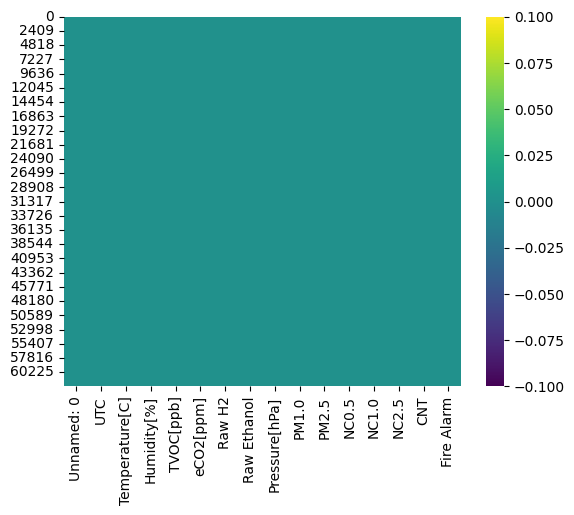

In [199]:
sns.heatmap(data.isnull(), cmap='viridis')

Our heatmap looks clean on each of the columns. <br>
now we can categoricaly say our dataset is void of missing values

<br><b>Note:</b> In the first index of the column (Unnamed:0) is not relevant as it is just idexing the rows as such we will drop it

In [200]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [201]:
# checking for wrong entries such as special symbols e.g -,?,*,#,$ etc.
for col in data.columns:
    print('{} : {}'.format(col, data[col].unique()))

UTC : [1654733331 1654733332 1654733333 ... 1655130049 1655130050 1655130051]
Temperature[C] : [20.    20.015 20.029 ... 15.714 16.333 16.957]
Humidity[%] : [57.36 56.67 55.96 ... 16.59 15.99 15.84]
TVOC[ppb] : [  0  30  36 ... 513 517 643]
eCO2[ppm] : [ 400  403  406 ... 1365 1013  948]
Raw H2 : [12306 12345 12374 ... 13727 13718 13731]
Raw Ethanol : [18520 18651 18764 ... 20413 20468 20482]
Pressure[hPa] : [939.735 939.744 939.738 ... 936.635 936.642 936.659]
PM1.0 : [0.   0.9  0.89 ... 4.98 4.57 3.62]
PM2.5 : [0.   3.78 3.71 ... 5.17 4.04 3.76]
NC0.5 : [ 0.    0.14  0.13 ... 26.73 24.89 19.27]
NC1.0 : [0.    4.369 4.289 ... 3.881 0.641 0.731]
NC2.5 : [0.    2.78  2.73  ... 0.202 0.16  0.121]
CNT : [    0     1     2 ... 24991 24992 24993]
Fire Alarm : [0 1]


It appears we don't have any character or symbols so we proceed with our analysis

Let's observe the correlation between each of the columns

In [202]:
# Graph plot with each of the columns in the dataset 
# Note: running this cell takes a lot of time
#sns.pairplot(data)

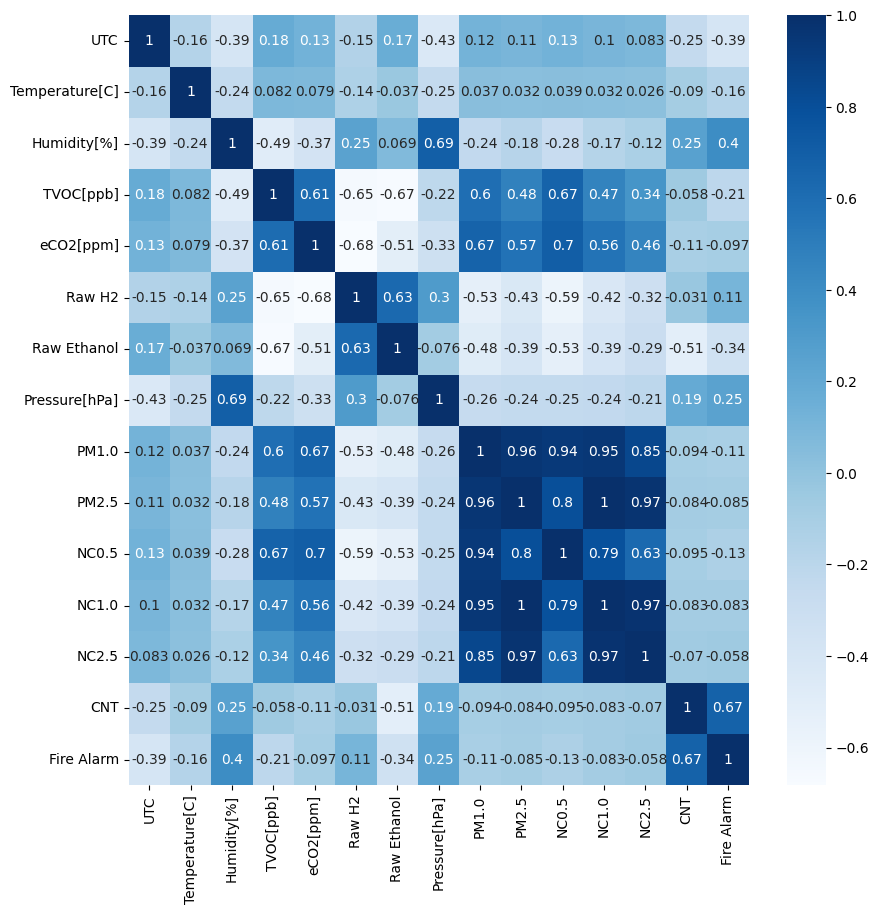

In [203]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Blues')
fig.savefig("matrix.png")

<b><u>Note:</u></b> 0.6 and above is considered as good correlation here<br>
- Our dataset seems too just have one (fair) correlation with the target column<b>(Fire Alarm)</b> so we cant specifically select columns that directly impact it.<br>
- <b>Temperature</b> does not have any strong correlation with any of the other columns
- <b>Pressure</b> only has strong correlation with <b>Humidity</b>
- Notice that all the <b>PM(1.0, 2.5)</b> and <b>NC(0.5, 1.0, 2.5)</b> has very strong correlation between them but they don't have high correlation with the Target column

## Training ML-Model<a class="anchor" id="model"></a>

### Data preprocessing <a class="anchor" id="preprocessing"></a>

Note: we will proceed with the other columns except for UTC and CNT the reason is that looking at the dataset from domain knowledge UTC and CNT does not impact fire outbrake. so we will select from 'temperature - NC2.5'.

In [204]:
input_cols = list(data.columns)[1:-2]
target_col = ['Fire Alarm']

In [205]:
train_inputs = data[input_cols].copy()
train_targets = data[target_col].copy()

In [206]:
# Spliting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(train_inputs, train_targets, test_size=0.2,random_state=42)

In [207]:
X_train.shape

(50104, 12)

We will be using *50104* dataset for training 

In [208]:
X_test.shape

(12526, 12)

We will be using *12526* dataset for validation to see how well our trained model is performing

In [209]:
X_train.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
28479,21.430,59.72,283,400,13138,19923,939.672,1.38,1.43,9.48,1.478,0.033
42605,25.980,47.24,1247,422,12886,19423,938.734,1.73,1.79,11.88,1.853,0.042
17963,18.116,47.55,1124,400,12909,19446,938.710,1.56,1.62,10.75,1.677,0.038
56394,59.620,11.60,60000,4305,11771,17216,936.746,1382.21,1624.71,9039.26,1709.083,216.618
29875,22.250,48.83,24,400,13255,20202,939.700,2.25,2.33,15.47,2.412,0.054


### Scaling the Features (Normalization)<a class="anchor" id="normalization"></a>

We need to normalise the values in our dataset because it dramatically improves model accuracy. Normalization gives equal weights/importance to each variable so that no single variable steers model performance in one direction just because they are bigger numbers.

In [210]:
scaler = MinMaxScaler().fit(data[input_cols])

X_train[input_cols] = scaler.transform(X_train[input_cols])
X_test[input_cols] = scaler.transform(X_test[input_cols])

In [211]:
X_test.describe().loc[['min', 'max']]

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
min,0.0,0.001706,0.0,0.000000,0.004785,0.025111,0.001110,0.000000,0.000000,0.00000,0.000000,0.000000
max,1.0,0.998138,1.0,0.856493,0.991707,1.000000,0.999001,0.991087,0.963304,0.99911,0.961897,0.949159


In [212]:
y_train

,Fire Alarm
28479,1
42605,1
17963,1
56394,0
29875,1
...,...
62570,0
38158,1
860,0
15795,1


Now we have our normalize data. Next we need to train our model for prediction

In [213]:
# This function evaluates the train dataset
def train_acc_model(models):
    model_name_list = []
    confusion_metrx_list = []
    execution_time_list = []
    model_score_list = []
    auc_list = []
    f1_score_list = []
    accuracy_score_list = []
    #print('Training dataset Evaluation with different metrix')
    
    for model in models:
        
        start = time.time()
        model.fit(X_train, y_train.values.ravel())
        end = time.time()
        
        model_name_list.append(type(model).__name__)

        #model prediction
        train_preds = model.predict(X_train)

        # model_score
        ms_train_preds = model.score(X_train, y_train)
        model_score_list.append(ms_train_preds)

        # Accuracy_score metrix
        as_train_acc = accuracy_score(y_train, train_preds)
        accuracy_score_list.append(as_train_acc)

        # confusion metrix
        cf_train_acc = confusion_matrix(y_train, train_preds)
        confusion_metrx_list.append(cf_train_acc)

        #Area under curve
        auc_train_acc = roc_auc_score(y_train, train_preds)
        auc_list.append(auc_train_acc)

        # f1 score
        f1_train_acc = f1_score(y_train, train_preds)
        f1_score_list.append(f1_train_acc)
        
        execution_time_list.append(end-start)

        Dict = {'Model':model_name_list,
                'Execution Time(sec)':execution_time_list,
                'Model Score':model_score_list, 
                'Confusion Metrx':confusion_metrx_list,
                'AUC':auc_list,
                'F1 Score ':f1_score_list, 
                'Accuracy Score':accuracy_score_list}
    return pd.DataFrame(Dict) 

In [214]:
# This function evaluates the test dataset
def test_acc_model(models):
    model_name_list = []
    confusion_metrx_list = []
    execution_time_list = []
    model_score_list = []
    auc_list = []
    f1_score_list = []
    accuracy_score_list = []
    feature_importance = []
    feature_imp_name = []
    
    #print('Evaluating Validation dataset with different metrix')
    
    for model in models:
        start = time.time()
        model.fit(X_train, y_train.values.ravel())
        end = time.time()
        try:
            feature_importance.append(pd.DataFrame({
                (str(model) + ': Features'): X_train.columns,
                'Importance': model.feature_importances_
            }).sort_values('Importance', ascending=False))
        except:
            pass
        
        model_name_list.append(type(model).__name__)

        #model prediction
        test_preds = model.predict(X_test)

        # model_score
        ms_val_preds = model.score(X_test, y_test)
        model_score_list.append(ms_val_preds)

        # Accuracy_score metrix
        as_test_acc = accuracy_score(y_test, test_preds)
        accuracy_score_list.append(as_test_acc)

        # confusion metrix
        cf_test_acc = confusion_matrix(y_test, test_preds)
        confusion_metrx_list.append(cf_test_acc)

        #Area under curve
        auc_test_acc = roc_auc_score(y_test, test_preds)
        auc_list.append(auc_test_acc)

        # f1 score
        f1_test_acc = f1_score(y_test, test_preds)
        f1_score_list.append(f1_test_acc)
        
        execution_time_list.append(end-start)

    Dict = {'Model':model_name_list,
            'Execution Time(sec)':execution_time_list,
            'Model Score':model_score_list, 
            'Confusion Metrx':confusion_metrx_list,
            'AUC':auc_list,
            'F1 Score ':f1_score_list, 
            'Accuracy Score':accuracy_score_list}

    #feat_imp_dict = {'Model name':feature_imp_name,
     #                'Feature Importance':feature_importance}
    
    return pd.DataFrame(Dict), feature_importance

In [215]:
# List of different machine learning models
models = [
    LogisticRegression(solver='lbfgs', max_iter=1000), 
    GradientBoostingClassifier(), 
    AdaBoostClassifier(), 
    ExtraTreeClassifier(), 
    DecisionTreeClassifier()
]

In [216]:
# The training accuracy
train_acc_model(models)

,Model,Execution Time(sec),Model Score,Confusion Metrx,AUC,F1 Score,Accuracy Score
0,LogisticRegression,0.536915,0.885957,"[[10011, 4268], [1446, 34379]]",0.830368,0.923273,0.885957
1,GradientBoostingClassifier,7.880617,0.999820,"[[14275, 4], [5, 35820]]",0.999790,0.999874,0.999820
2,AdaBoostClassifier,1.548928,0.999501,"[[14266, 13], [12, 35813]]",0.999377,0.999651,0.999501
3,ExtraTreeClassifier,0.007329,1.000000,"[[14279, 0], [0, 35825]]",1.000000,1.000000,1.000000
4,DecisionTreeClassifier,0.124833,1.000000,"[[14279, 0], [0, 35825]]",1.000000,1.000000,1.000000


In [217]:
testing_acc, feature_importance = test_acc_model(models)

In [218]:
testing_acc

,Model,Execution Time(sec),Model Score,Confusion Metrx,AUC,F1 Score,Accuracy Score
0,LogisticRegression,0.727900,0.883123,"[[2521, 1073], [391, 8541]]",0.828836,0.921061,0.883123
1,GradientBoostingClassifier,8.165353,0.999760,"[[3591, 3], [0, 8932]]",0.999583,0.999832,0.999760
2,AdaBoostClassifier,1.840403,0.999521,"[[3591, 3], [3, 8929]]",0.999415,0.999664,0.999521
3,ExtraTreeClassifier,0.009619,0.998802,"[[3590, 4], [11, 8921]]",0.998828,0.999160,0.998802
4,DecisionTreeClassifier,0.134377,0.999760,"[[3593, 1], [2, 8930]]",0.999749,0.999832,0.999760


Two functions which return a dataframe were created in the above cells.<br>

The first function <b>(train_acc_model(models))</b> takes in as input a list of models and return a dataframe containing the model name, evaluation time for each model and different evaluation metrices.<br>

The second function <b>(test_acc_model(models))</b> takes in as input a list of models and return a dataframe containing the model name, evaluation time for each model and different evaluation metrices.<br>

Five different models were trained on the smoke dataset and tested on the validation dataset and we got a 99% accuracy for almost all the models except for LogisticRegression. so our model did pretty well

### Feature Importance <a class="anchor" id="f_importance"></a>

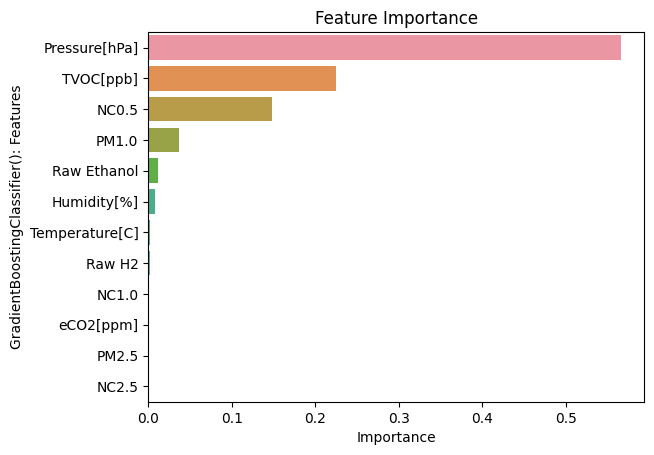

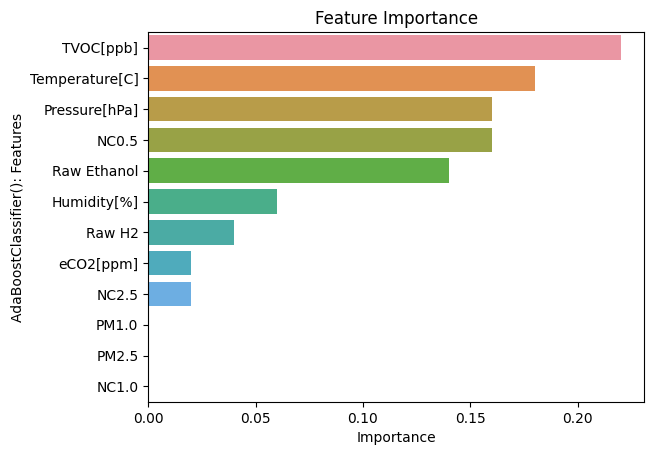

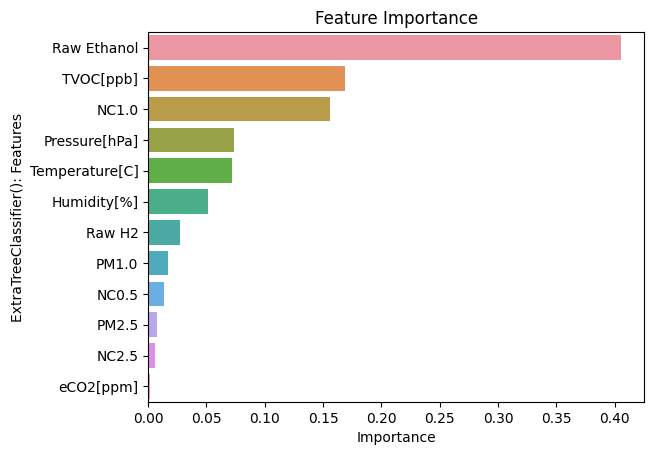

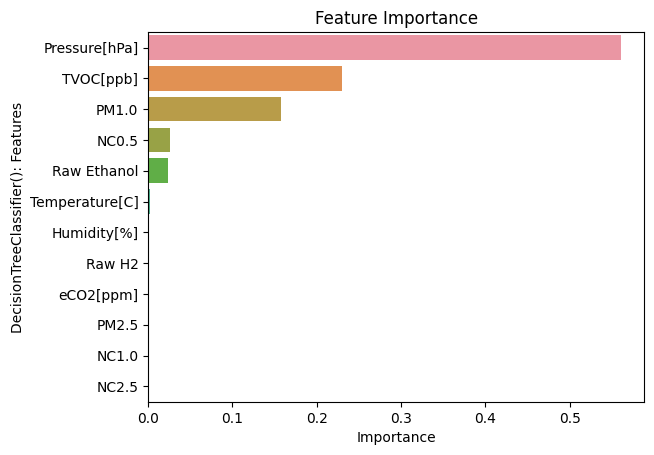

In [219]:
# initializing to index 0 to plot feature for first model
for each_model in range(len(feature_importance)):
    plt.title('Feature Importance')
    ax = sns.barplot(data=feature_importance[each_model], x='Importance', y = feature_importance[each_model].columns[0]);
    fig = ax.get_figure()
    plt.show()
    fig.savefig("FeatureImportance{0}.png".format(each_model)) 

The graph above is showing us the feature importance for each model used. You will notice that the feature importance differs for the extratree and adaboost while gradientboost and decisiontree have similar importance.
Which ever model we decide to use for production we know the particular features to give priorites.<br>
<b>Note:</b> All the features in our dataset contributes to the accuracy of the models only the importance varies.

### Conclusion <a class="anchor" id="conclusion"></a>

So far we have been able to perform EDA on the <a id="https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset">Smoke Dataset</a>. There was no missing so no much of cleaning done. we droped 3 columns that are not neccessary for prediction ('Unnamed: 0', 'UTC' and 'CNT'). We then splited the dataset into train and test and then trained five models to make make prediction for us and finally we platted a graph for the five model to see the feature importance for each.